In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

# Using other data formats

In [5]:
path = untar_data(URLs.MNIST_SAMPLE)
path

PosixPath('/root/.fastai/data/mnist_sample')

In [10]:
import os
os.listdir(path)

['labels.csv', 'valid', 'train']

In [12]:
os.listdir(path/'train')

['7', '3']

In [0]:
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path,ds_tfms=tfms,size=26)

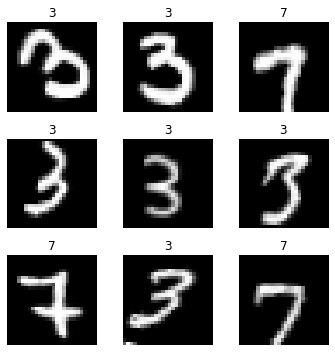

In [8]:
data.show_batch(rows=3,figsize=(5,5))

In [11]:
ds = data.train_ds
print(ds)

LabelList (12396 items)
x: ImageList
Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26)
y: CategoryList
7,7,7,7,7
Path: /root/.fastai/data/mnist_sample


In [13]:
vds = data.valid_ds
print(vds)

LabelList (2038 items)
x: ImageList
Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26)
y: CategoryList
7,7,7,7,7
Path: /root/.fastai/data/mnist_sample


In [9]:
learn = cnn_learner(data,models.resnet18,metrics=accuracy)
learn.fit(2)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,accuracy,time
0,0.210317,0.119308,0.959764,00:25
1,0.131451,0.054180,0.982336,00:23


# Using CSV

In [15]:
df = pd.read_csv(path/'labels.csv')
df.head()

,name,label
0,train/3/7463.png,0
1,train/3/21102.png,0
2,train/3/31559.png,0
3,train/3/46882.png,0
4,train/3/26209.png,0


In [0]:
data = ImageDataBunch.from_csv(path,ds_tfms=tfms,size=28)

[0, 1]

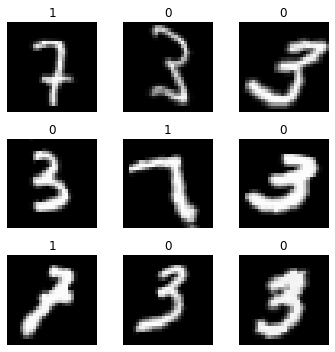

In [17]:
data.show_batch(rows=3,figsize=(5,5))
data.classes

In [18]:
data = ImageDataBunch.from_df(path,df,ds_tfms=tfms,size=24)
data.classes

[0, 1]